## Experimenting with t distribution

This notebook is intended to can a little better understanding of the t distribution and seeing how it's generated.

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Take a whole lot of small samples from a normal distribution.

In [2]:
n_samples = 100000
n_draws = 5
samples = stats.norm(0, 3).rvs((n_draws, n_samples))

Calculate the means and *sample* standard deviation (the unbiased estimator, with the denominator of $n-1$)

In [3]:
means = samples.mean(axis=0)
stds = samples.std(axis=0, ddof=1)

Divide the means by the standard error.

In [4]:
means *= n_draws ** 0.5 / stds

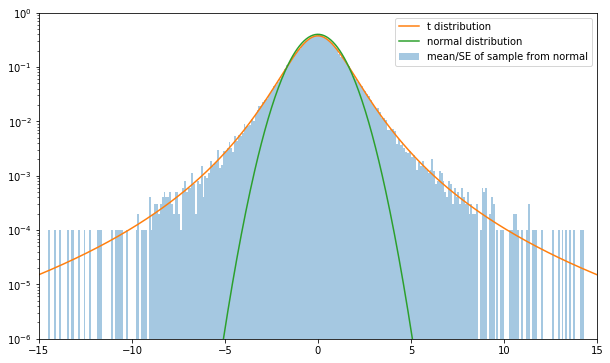

In [5]:
lims=(-15, 15)
fig, ax = plt.subplots(figsize=(10,6))
xpts = np.linspace(*lims, 500)
ax.hist(means, density=True, bins=np.arange(-30, 30, 0.1), alpha=0.4, label='mean/SE of sample from normal')
ax.plot(xpts, stats.t(n_draws - 1).pdf(xpts), label='t distribution')
ax.plot(xpts, stats.norm(0, 1).pdf(xpts), label='normal distribution')
ax.set_xlim(*lims)
ax.set_ylim(0.000001, 1.0)
ax.set_yscale('log')
ax.legend()

In [6]:
means.min(), means.max()

(-28.431846019661336, 42.10562918446932)

In [7]:
stats.t(1).var()

inf